In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [92]:
train_df=pd.read_csv('train.csv')

In [6]:
#train_df.set_index('inst_id',inplace=True) => 뒤에서

In [93]:
train_df['openDate']=pd.to_datetime(train_df['openDate'], format="%Y%m%d")

In [94]:
train_df['OC']=train_df['OC'].replace('open',1)
train_df['OC']=train_df['OC'].replace(' close',0)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 428
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OC                  301 non-null    int64         
 1   sido                301 non-null    object        
 2   sgg                 301 non-null    int64         
 3   openDate            301 non-null    datetime64[ns]
 4   bedCount            296 non-null    float64       
 5   instkind            300 non-null    object        
 6   revenue1            293 non-null    float64       
 7   salescost1          293 non-null    float64       
 8   sga1                293 non-null    float64       
 9   salary1             293 non-null    float64       
 10  noi1                293 non-null    float64       
 11  noe1                293 non-null    float64       
 12  interest1           293 non-null    float64       
 13  ctax1               293 non-null    float64       

In [10]:
train_df.head()

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,
1,1,choongnam,73,2007-12-28,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
3,1,gyeongnam,32,1997-04-01,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
4,1,gyeonggi,89,2016-12-28,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
7,1,incheon,141,2000-08-14,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
9,1,gyeongnam,32,2005-09-01,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [95]:
#결측치가 많은 행(8개 행) 삭제
train_df=train_df.dropna(subset=['revenue1'])
train_df.reset_index(drop=True, inplace=True)
train_df

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,choongnam,73,2007-12-28,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,4,1,gyeonggi,89,2016-12-28,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
2,7,1,incheon,141,2000-08-14,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
3,9,1,gyeongnam,32,2005-09-01,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
4,11,1,gyeongnam,155,2002-05-01,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,422,1,jeonnam,178,2005-02-11,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
289,423,0,choongnam,159,2014-06-18,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
290,426,0,gyeongbuk,107,1983-07-05,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
291,427,0,gyeonggi,169,2007-01-01,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [12]:
train_drop=train_df.dropna()
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 1 to 422
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OC                  277 non-null    int64         
 1   sido                277 non-null    object        
 2   sgg                 277 non-null    int64         
 3   openDate            277 non-null    datetime64[ns]
 4   bedCount            277 non-null    float64       
 5   instkind            277 non-null    object        
 6   revenue1            277 non-null    float64       
 7   salescost1          277 non-null    float64       
 8   sga1                277 non-null    float64       
 9   salary1             277 non-null    float64       
 10  noi1                277 non-null    float64       
 11  noe1                277 non-null    float64       
 12  interest1           277 non-null    float64       
 13  ctax1               277 non-null    float64       

In [121]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
sido_cat = ohe.fit_transform(train_df[['sido']])
sido_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [122]:
ohe.categories_

[array(['busan', 'choongbuk', 'choongnam', 'daegu', 'daejeon', 'gangwon',
        'gwangju', 'gyeongbuk', 'gyeonggi', 'gyeongnam', 'incheon',
        'jeonbuk', 'jeonnam', 'sejong', 'seoul', 'ulsan'], dtype=object)]

In [123]:
pd.DataFrame(sido_cat, columns=['sido_' + col for col in ohe.categories_[0]])

,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
train_df=pd.concat([train_df.drop(columns=['sido']),
           pd.DataFrame(sido_cat, columns=['sido_' + col for col in ohe.categories_[0]])], axis=1)
train_df #sido 변수 원핫인코딩 후 train_df에 병합

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,1,1,73,2007-12-28,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,89,2016-12-28,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1,141,2000-08-14,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,9,1,32,2005-09-01,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,1,155,2002-05-01,243.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,422,1,178,2005-02-11,214.0,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
289,423,0,159,2014-06-18,NaN,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,426,0,107,1983-07-05,NaN,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,427,0,169,2007-01-01,180.0,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
ohe = OneHotEncoder(sparse=False)
instkind_cat = ohe.fit_transform(train_df[['instkind']])
instkind_cat

In [101]:
ohe.categories_

[array(['clinic', 'dental_clinic', 'general_hospital', 'hospital',
        'nursing_hospital', 'traditional_clinic', 'traditional_hospital',
        nan], dtype=object)]

In [102]:
ohe.categories_[0]

array(['clinic', 'dental_clinic', 'general_hospital', 'hospital',
       'nursing_hospital', 'traditional_clinic', 'traditional_hospital',
       nan], dtype=object)

In [109]:
instkind_df=pd.DataFrame(instkind_cat, columns=['instkind_' + col for col in ohe.categories_[0]])

In [117]:
instkind_df=instkind_df.iloc[:, :7] #nan 변수 제외 (nan의 경우 knnimputer 사용해서 먼저 처리해줄 수도 있음.)

In [236]:
train_df=pd.concat([train_df.drop(columns=['instkind']),
           instkind_df], axis=1) #instkind 원핫인코딩 후 train_df에 병합

In [131]:
train_df.drop('sgg',axis=1,inplace=True)  #시군구 변수 삭제

In [128]:
def split_year(time):
    time = str(time)
    return int(time.split('-')[0])

def split_month(time):
    time = str(time)
    return int(time.split('-')[1])

train_df['Year'] = train_df['openDate'].apply(split_year)
train_df['Month'] = train_df['openDate'].apply(split_month) #year, month 변수 생성 => 개업으로 부터 지난 시간 변수로 합칠 수 있을 듯.

In [130]:
train_df.drop('openDate',axis=1,inplace=True)

In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   inst_id               293 non-null    int64  
 1   OC                    293 non-null    int64  
 2   bedCount              288 non-null    float64
 3   revenue1              293 non-null    float64
 4   salescost1            293 non-null    float64
 5   sga1                  293 non-null    float64
 6   salary1               293 non-null    float64
 7   noi1                  293 non-null    float64
 8   noe1                  293 non-null    float64
 9   interest1             293 non-null    float64
 10  ctax1                 293 non-null    float64
 11  profit1               293 non-null    float64
 12  liquidAsset1          293 non-null    float64
 13  quickAsset1           293 non-null    float64
 14  receivableS1          293 non-null    float64
 15  inventoryAsset1       2

In [20]:
train_df=train_df.astype({'OC':'category'})
train_df=train_df.astype({'sido':'category'})
train_df=train_df.astype({'sgg':'category'})
train_df=train_df.astype({'instkind':'category'})
train_df=train_df.astype({'ownerChange':'category'})

In [133]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['ownerChange'].isnull()])

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,Year,Month
45,74,1,28.0,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1994,4
57,96,1,128.0,5.236406e+08,2.306773e+07,8.355775e+08,5.644636e+08,7534205.0,5.263060e+07,52630597.0,0.0,-3.801011e+08,6.073662e+08,5.953914e+08,1.015000e+06,11974763.0,3.629704e+09,3.629704e+09,0.0,0.0,3.513950e+09,3.342069e+09,2.918153e+09,1.718817e+08,1.718817e+08,7.231197e+08,723119742.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,6
88,140,0,203.0,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,4
201,298,1,160.0,3.279139e+09,3.726966e+08,3.507972e+09,2.659892e+09,1596568.0,8.306566e+07,83065655.0,0.0,-6.829984e+08,4.237100e+08,3.662513e+08,1.826044e+08,57458700.0,6.990698e+09,6.972698e+09,8000000.0,0.0,3.478121e+09,6.481208e+08,0.000000e+00,2.830000e+09,2.830000e+09,3.936287e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1
207,306,0,66.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3

In [14]:
#! pip install impyute

In [154]:
train_df['employee2'].fillna(train_df['employee1'],inplace=True) #2016/2017 직원 수 같다고 가정

In [156]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['employee1'].isnull()])

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,Year,Month
45,74,1,28.0,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1994,4
88,140,0,203.0,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,4
201,298,1,160.0,3.279139e+09,3.726966e+08,3.507972e+09,2.659892e+09,1596568.0,8.306566e+07,83065655.0,0.0,-6.829984e+08,4.237100e+08,3.662513e+08,1.826044e+08,57458700.0,6.990698e+09,6.972698e+09,8000000.0,0.0,3.478121e+09,6.481208e+08,0.000000e+00,2.830000e+09,2.830000e+09,3.936287e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1
207,306,0,66.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1999,6
237,345,1,0.0,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+

In [157]:
train_df['employee1'].fillna(train_df['employee2'],inplace=True)

In [158]:
from sklearn.impute import KNNImputer

In [159]:
imputer=KNNImputer(n_neighbors=2)

In [161]:
train_df['ownerChange']=train_df['ownerChange'].replace('change',1)
train_df['ownerChange']=train_df['ownerChange'].replace('same',0) #knnimputer 사용하기 위해 숫자로 변환

In [165]:
train_knn=train_df.drop(['bedCount','employee1','employee2'],axis=1) #결측치 있는 변수 제외하고 knnimputer 적용

In [166]:
train_knn.info() #ownerChange 결측치 채워짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 76 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   inst_id               293 non-null    int64  
 1   OC                    293 non-null    int64  
 2   revenue1              293 non-null    float64
 3   salescost1            293 non-null    float64
 4   sga1                  293 non-null    float64
 5   salary1               293 non-null    float64
 6   noi1                  293 non-null    float64
 7   noe1                  293 non-null    float64
 8   interest1             293 non-null    float64
 9   ctax1                 293 non-null    float64
 10  profit1               293 non-null    float64
 11  liquidAsset1          293 non-null    float64
 12  quickAsset1           293 non-null    float64
 13  receivableS1          293 non-null    float64
 14  inventoryAsset1       293 non-null    float64
 15  nonCAsset1            2

In [170]:
train_knn=imputer.fit_transform(train_knn)
train_knn=pd.DataFrame(train_knn)
with pd.option_context("display.max_columns", 100):
    display(train_knn)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1.0,1.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,12.0
1,4.0,1.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,12.0
2,7.0,1.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,8.383875e+08,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,8.0
3,9.0,1.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,3.264258e+07,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0,9.0
4,11.0,1.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,7.412694e+08,3.364622e+08,0.0,-4.622738e+07,5.635105e+09,5.481680e+09,6.634820e+08,1.534246e+08,1.864970e+10,1.849938e+10,1.364582e+08,0.0,0.000000e+00,1.849938e+10,1.718053e+10,0.000000e+00,0.000000e+00,0.000000e+00,3.664918e+09,3.433445e+10,9.839139e+09,2.409622e+10,1.638792e+10,125681154.0,4.500830e+08,4.155104e+08,0.0,7.468595e+07,4.869419e+09,4.725857e+09,1.976163e+08,1.435618e+08,2.212715e+10,2.186113e+10,1.910460e+08,0.0,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [181]:
with pd.option_context("display.max_columns", 300):
    display(train_knn[train_knn.iloc[:,50]>=0.5])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
11,22.0,1.0,2.998496e+09,1.385685e+08,2.485503e+09,1.398272e+09,7.558900e+04,3.727438e+08,3.619707e+08,0.000000e+00,1.755680e+06,1.268058e+09,1.208024e+09,6.022501e+08,6.003400e+07,2.190528e+10,2.169000e+10,2.152789e+08,0.0,1.521791e+10,1.236278e+10,1.115530e+10,2.855129e+09,2.363790e+09,7.955426e+09,0.000000e+00,2.893264e+09,1.491580e+08,2.452307e+09,1.262933e+09,1.820000e+02,2.071287e+08,2.071287e+08,0.000000e+00,8.467024e+07,9.150126e+08,9.047326e+08,2.678374e+08,1.028000e+07,2.251878e+10,2.202890e+10,2.498864e+08,0.0,1.291003e+10,2.748071e+09,1.392354e+09,1.016196e+10,1.015280e+10,1.052376e+10,0.000000e+00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0,9.0
14,33.0,1.0,1.569070e+10,0.000000e+00,1.569032e+10,8.142441e+09,5.112152e+08,2.474768e+09,3.197050e+08,0.000000e+00,-1.963172e+09,3.712672e+09,3.689155e+09,1.003339e+08,2.351665e+07,1.810843e+10,1.638377e+10,1.666950e+09,0.0,1.871257e+10,1.542249e+10,8.857822e+09,3.290076e+09,0.000000e+00,3.108533e+09,0.000000e+00,1.468658e+10,0.000000e+00,1.466864e+10,7.776281e+09,2.798723e+08,6.960278e+08,3.253105e+08,0.000000e+00,-3.982132e+08,3.863427e+09,3.844126e+09,1.288089e+08,1.930106e+07,1.936234e+10,1.715965e+10,1.652407e+09,0.0,1.815406e+10,1.653406e+10,9.490786e+09,1.620000e+09,0.000000e+00,5.071706e+09,0.000000e+00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1982.0,3.0
15,34.0,1.0,3.892860e+10,8.449315e+09,2.873623e+10,1.888037e+10,2.373243e+08,1.543530e+09,1.042223e+09,3.963161e+07,3.972146e+08,2.284475e+10,2.236199e+10,4.761275e+09,4.827518e+08,8.844509e+10,8.599007e+10,2.422999e+09,0.0,5.213188e+10,2.047714e+10,8.732077e+09,3.165474e+10,2.688217e+10,5.915796e+10,9.220859e+08,3.623379e+10,8.510963e+09,2.639329e+10,1.752326e+10,2.287877e+08,1.143289e+09,9.982168e+08,8.350536e+07,3.315340e+08,2.342237e+10,2.284849e+10,3.615003e+09,5.738849e+08,7.575287e+10,7.322461e+10,2.484777e+09,0.0,4.041450e+10,1.886548e+10,7.790456e+09,2.154902e+10,1.822667e+10,5.876074e+10,5.248713e+08,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012.0,12.0
19,38.0,1.0,6.706899e+10,0.000000e+00,6.349618e+10,2.979396e+10,2.592035e+09,5.335544e+09,2.841475e+09,3.241384e+08,5.051658e+08,1.936062e+10,1.824419e+10,1.832442e+08,1.116428e+09,1.020000e+11,9.638917e+10,2.114020e+09,0.0,8.669725e+10,3.789535e+10,8.416499e+09,4.880190e+10,4.112490e+10,3.480444e+10,1.092972e+10,6.570655e+10,0.000000e+00,6.034038e+10,2.792834e+10,2.037276e+09,5.641498e+09,2.593366e+09,2.732035e+08,1.488741e+09,1.849308e+10,1.764267e+10,2.067248e+08,8.504096e+08,1.010000e+11,9.623452e+10,7.760510e+08,0.0,8.508858e+10,6.846878e+10,1.201300e+10,1.661981e+10,9.711298e+09,3.465059e+10,1.128104e+10,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0,10.0
20,39.0,1.0,9.293956e+09,0.000000e+00,1.098049e+10,5.578216e+09,1.252609e+08,2.351155e+08,2.311045e+08,0.000000e+00,-1.796386e+09,1.500644e+09,1.358172e+09,0.000000e+00,1.424716e+08,8.642147e+09,8.475547e+09,0.000000e+00,0.0,7.907163e+09,7.260544e+09,6.257142e+09,6.466194e+08,0.000000e+00,2.235628e+09,6.019553e+09,1.078719e+10,0.000000e+00,1.165192e+10,6.879270e+09,1.519729e+08,2.328106e+08,2.326005e+08,0.000000e+00,-9.455685e+08,1.669906e+09,1.562542e+09,0.000000e+00,1.073639e+08,8.701062e+09,8.534462e+09,0.000000e+00,0.0,7.338954e+09,6.135746e+09,5.306693e+09,1.203208e+09,0.000000e+00,3.032014e+09,6.019553e+09,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1982.0,4.0
32,58.0,0.0,2.681766e+09,1.802009e+08,2.014580e+09,9.366451e+08,5.992407e+07,4.287212e+08,2.840695e+08,0.000000e+00,1.181879e+08,0.000000e+00,0.000000

In [185]:
train_knn.iloc[:,50]=train_knn.iloc[:,50].replace(0.5,1)
train_knn.loc[290,50] #0.5로 예측된 관측치 1로 변환

1.0

In [186]:
train_df['ownerChange']=train_knn.iloc[:,50] #knnimputer 적용한 데이터 넣어줌

In [188]:
train_df.loc[290,'ownerChange']

1.0

! knnimputer 사용 전 scaling을 안한 거 같음

In [189]:
from impyute.imputation.cs import mice
np_imputed=mice(train_df.values) 
train_imputed = pd.DataFrame(np_imputed) #mice 이용해 bedCount, employee1, employee2 결측치 처리

In [147]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['bedCount'].isnull()])

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,Year,Month
66,107,0,NaN,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,56630198.0,228194537.0,113598011.0,22221340.0,2.653634e+08,1.970952e+09,1.963787e+09,0.000000e+00,7165400.0,3.553691e+09,2.749986e+09,527179060.0,0.0,2.803885e+09,2.793826e+09,2.590000e+09,1.005862e+07,0.000000e+00,2.720758e+09,0.000000e+00,3.318141e+09,1.443104e+08,2.982098e+09,1.709276e+09,58244152.0,164510269.0,91316429.0,13350570.0,72115788.0,1.694659e+09,1.686307e+09,0.000000e+00,8351300.0,3.451466e+09,2.778451e+09,410506320.0,0.0,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1999,8
188,281,0,NaN,3.054388e+08,2.241614e+07,4.674753e+08,2.548688e+08,13451554.0,90129732.0,4239523.0,0.0,-2.611308e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.342966e+08,6.435569e+07,8.693647e+08,6.757184e+08,1333.0,24317070.0,5929772.0,0.0,-423739612.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.0,15.0,change,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012,12
289,423,0,NaN,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,139851326.0,129697525.0,0.0,-1.622521e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,6
290,426,0,NaN,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,137980960.0,137980960.0,0.0,-7.175308e+07,3.867238e+09,3.867238e+09,1.132312e+09,0.0,5.569636e+09,5.419756e+09,67957340.0,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00,3.132198e+09,2.971193e+09,3.529793e+08,1.479400e+08,173212032.0,133064432.0,107972617.0,0.0,-151827207.0,4.074622e+09,4.069797e+09,1.132312e+09,4825310.0,5.554636e+09,5.419756e+09,52957340.0,0.0,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1983,7
292,428,1,NaN,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,2264007.0,73558495.0,73558495.0,0.0,-4.550929e+07,6.624176e+08,6.197801e+08,1.545963e+07,42637474.0,1.024680e+10,1.011968e+10,86930500.0,0.0,5.418547e+09,3.187619e+09,0.000000e+00,2.230928e+09,2.190000e+09,5.490668e+09,6.269440e+09,1.499012e+09,8.328015e+08,5.254614e+08,1.333380e+08,4301929.0,94393907.0,94355280.0,0.0,50657033.0,4.969613e+08,4.526867e+08,

In [190]:
with pd.option_context("display.max_columns", 100):
    display(train_imputed.loc[[66,188,289,290,292]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
66,107.0,0.0,178.011581,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,56630198.0,228194537.0,113598011.0,22221340.0,2.653634e+08,1.970952e+09,1.963787e+09,0.000000e+00,7165400.0,3.553691e+09,2.749986e+09,527179060.0,0.0,2.803885e+09,2.793826e+09,2.590000e+09,1.005862e+07,0.000000e+00,2.720758e+09,0.000000e+00,3.318141e+09,1.443104e+08,2.982098e+09,1.709276e+09,58244152.0,164510269.0,91316429.0,13350570.0,72115788.0,1.694659e+09,1.686307e+09,0.000000e+00,8351300.0,3.451466e+09,2.778451e+09,410506320.0,0.0,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.000000,74.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1999.0,8.0
188,281.0,0.0,71.433283,3.054388e+08,2.241614e+07,4.674753e+08,2.548688e+08,13451554.0,90129732.0,4239523.0,0.0,-2.611308e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.342966e+08,6.435569e+07,8.693647e+08,6.757184e+08,1333.0,24317070.0,5929772.0,0.0,-423739612.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.000000,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0,12.0
289,423.0,0.0,87.742673,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,139851326.0,129697525.0,0.0,-1.622521e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.000000,79.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,6.0
290,426.0,0.0,119.115258,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,137980960.0,137980960.0,0.0,-7.175308e+07,3.867238e+09,3.867238e+09,1.132312e+09,0.0,5.569636e+09,5.419756e+09,67957340.0,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00,3.132198e+09,2.971193e+09,3.529793e+08,1.479400e+08,173212032.0,133064432.0,107972617.0,0.0,-151827207.0,4.074622e+09,4.069797e+09,1.132312e+09,4825310.0,5.554636e+09,5.419756e+09,52957340.0,0.0,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,71.952874,101.677419,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1983.0,7.0
292,428.0,1.0,-36.052230,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,2264007.0,73558495.0,73558495.0,0.0,-4.550929e+07,6.624176e+08,6.197801e+08,1.545963e+07,42637474.0,1.024680e+10,1.011968e+10,86930500.0,0.0,5.418547e+09,3.187619e+09,0.000000e+00,2.230928e+09,2.190000e+09,5.490668e+09,6.269440e+09,1.499012e+09,8.328015e+08,5.254614e+08,1.333380e+08,4301929.0,94393907.0,94355280.0,0.0,50657033.0,4.969613e+08,4.526867e+08,1.545534e+07,44274527.0,1.038822e+10,1.026110e+10,86930500.0,0.0,5.349000e+09,3.123072e+09,0.000000e+00,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.000000,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001.0,10.0


변수 2가 bedCount.  
-36.05… -> 0 으로 바꿔야함

In [195]:
train_imputed.loc[292,2]=0

In [192]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['employee2'].isnull()])

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,Year,Month
45,74,1,28.0,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1994,4
88,140,0,203.0,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,4
207,306,0,66.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1999,6
237,345,1,0.0,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+07,1.172968e+09,1.171014e+09,4.916044e+07,0.0,7.968085e+08,5.268085e+08,270000000.0,0.0,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,4
255,369,1,39.0,3.007769e+09,1.197756e+09,2.258240e+09,1.775322e+09,611489427.0,5.279657e+07,52076570.0,0.0,1.104651e+08,9.443247e+08,8.065135e+08,4.782392e+08,137811283.0,2.105344e+09,1.999416e+09,100700000.0,0.0,1.898375e+09,3.590747e+08,0.000000e+00,1.539300e+09,1.539300e+09,1.151294e+09,359919226.0,2.890536e+09,1.210112e+09,2.202889e+09,1.781860e+09,672171687.0,5.4856

In [193]:
with pd.option_context("display.max_columns", 100):
    display(train_imputed.loc[[45,88,207,237,255,277,290]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
45,74.0,1.0,28.000000,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,77.581188,67.929346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1994.0,4.0
88,140.0,0.0,203.000000,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,113.578629,125.773894,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,4.0
207,306.0,0.0,66.000000,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,141.343473,189.725880,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1999.0,6.0
237,345.0,1.0,0.000000,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+07,1.172968e+09,1.171014e+09,4.916044e+07,0.0,7.968085e+08,5.268085e+08,270000000.0,0.0,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,83.412395,75.595860,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,4.0
255,369.0,1.0,39.000000,3.007769e+09,1.197756e+09,2.258240e+09,1.775322e+09,611489427.0,5.279657e+07,52076570.0,0.0,1.104651e+08,9.443247e+08,8.065135e+08,4.782392e+08,137811283.0,2.105344e+09,1.999416e+09,100700000.0,0.0,1.898375e+09,3.590747e+08,0.000000e+00,1.539300e+09,1.539300e+09,1.151294e+09,359919226.0,2.890536e+09,1.210112e+09,2.202889e+09,1.781860e+09,672171687.0,5.485612e+07,51537693.0,0.0,9.485052e+07,7.930804e+08,7.381844e+08,5.172024e+08,54896000.0,2.107922e+09,2.001994e+09,100700000.0,0.0,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,226197450.0,74.281190,98.292856,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0,1.0
277,407.0,1.0,119.000000,9.618709e+09,0.000000e+00,9.751211e+09,4.979714e+09,813200615.0,5.543432e+08,27044684.0,21939910.0,1.044148e+08,3.764172e+09,3.597632e+09,3.138857e+07,166540594

변수 51,52가 employee1, employee2. (int형으로 변환해도 됨.)

In [197]:
train_df['employee1']=train_imputed.iloc[:,51]
train_df['employee1']=train_imputed.iloc[:,52]

In [200]:
train_df['bedCount']=train_imputed.iloc[:,2]

In [201]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   inst_id               293 non-null    int64  
 1   OC                    293 non-null    int64  
 2   bedCount              293 non-null    float64
 3   revenue1              293 non-null    float64
 4   salescost1            293 non-null    float64
 5   sga1                  293 non-null    float64
 6   salary1               293 non-null    float64
 7   noi1                  293 non-null    float64
 8   noe1                  293 non-null    float64
 9   interest1             293 non-null    float64
 10  ctax1                 293 non-null    float64
 11  profit1               293 non-null    float64
 12  liquidAsset1          293 non-null    float64
 13  quickAsset1           293 non-null    float64
 14  receivableS1          293 non-null    float64
 15  inventoryAsset1       2

결측치 모두 처리 됨.

In [203]:
skewness = train_df.apply(lambda x: x.skew()).sort_values(ascending=False)
skewness

sido_sejong         17.117243
receivableL1        17.117243
dental_clinic       17.117243
receivableL2        17.117243
surplus1            14.572551
                      ...    
Month                0.087368
nursing_hospital     0.075525
inst_id             -0.062545
Year                -1.184158
OC                  -4.093737
Length: 79, dtype: float64

In [238]:
skew_feats = skewness[skewness>1].index
log_train_df = train_df.copy()
log_train_df[skew_feats] = np.log1p(log_train_df[skew_feats]) #왜도가 1이 넘는 feature 로그변환.

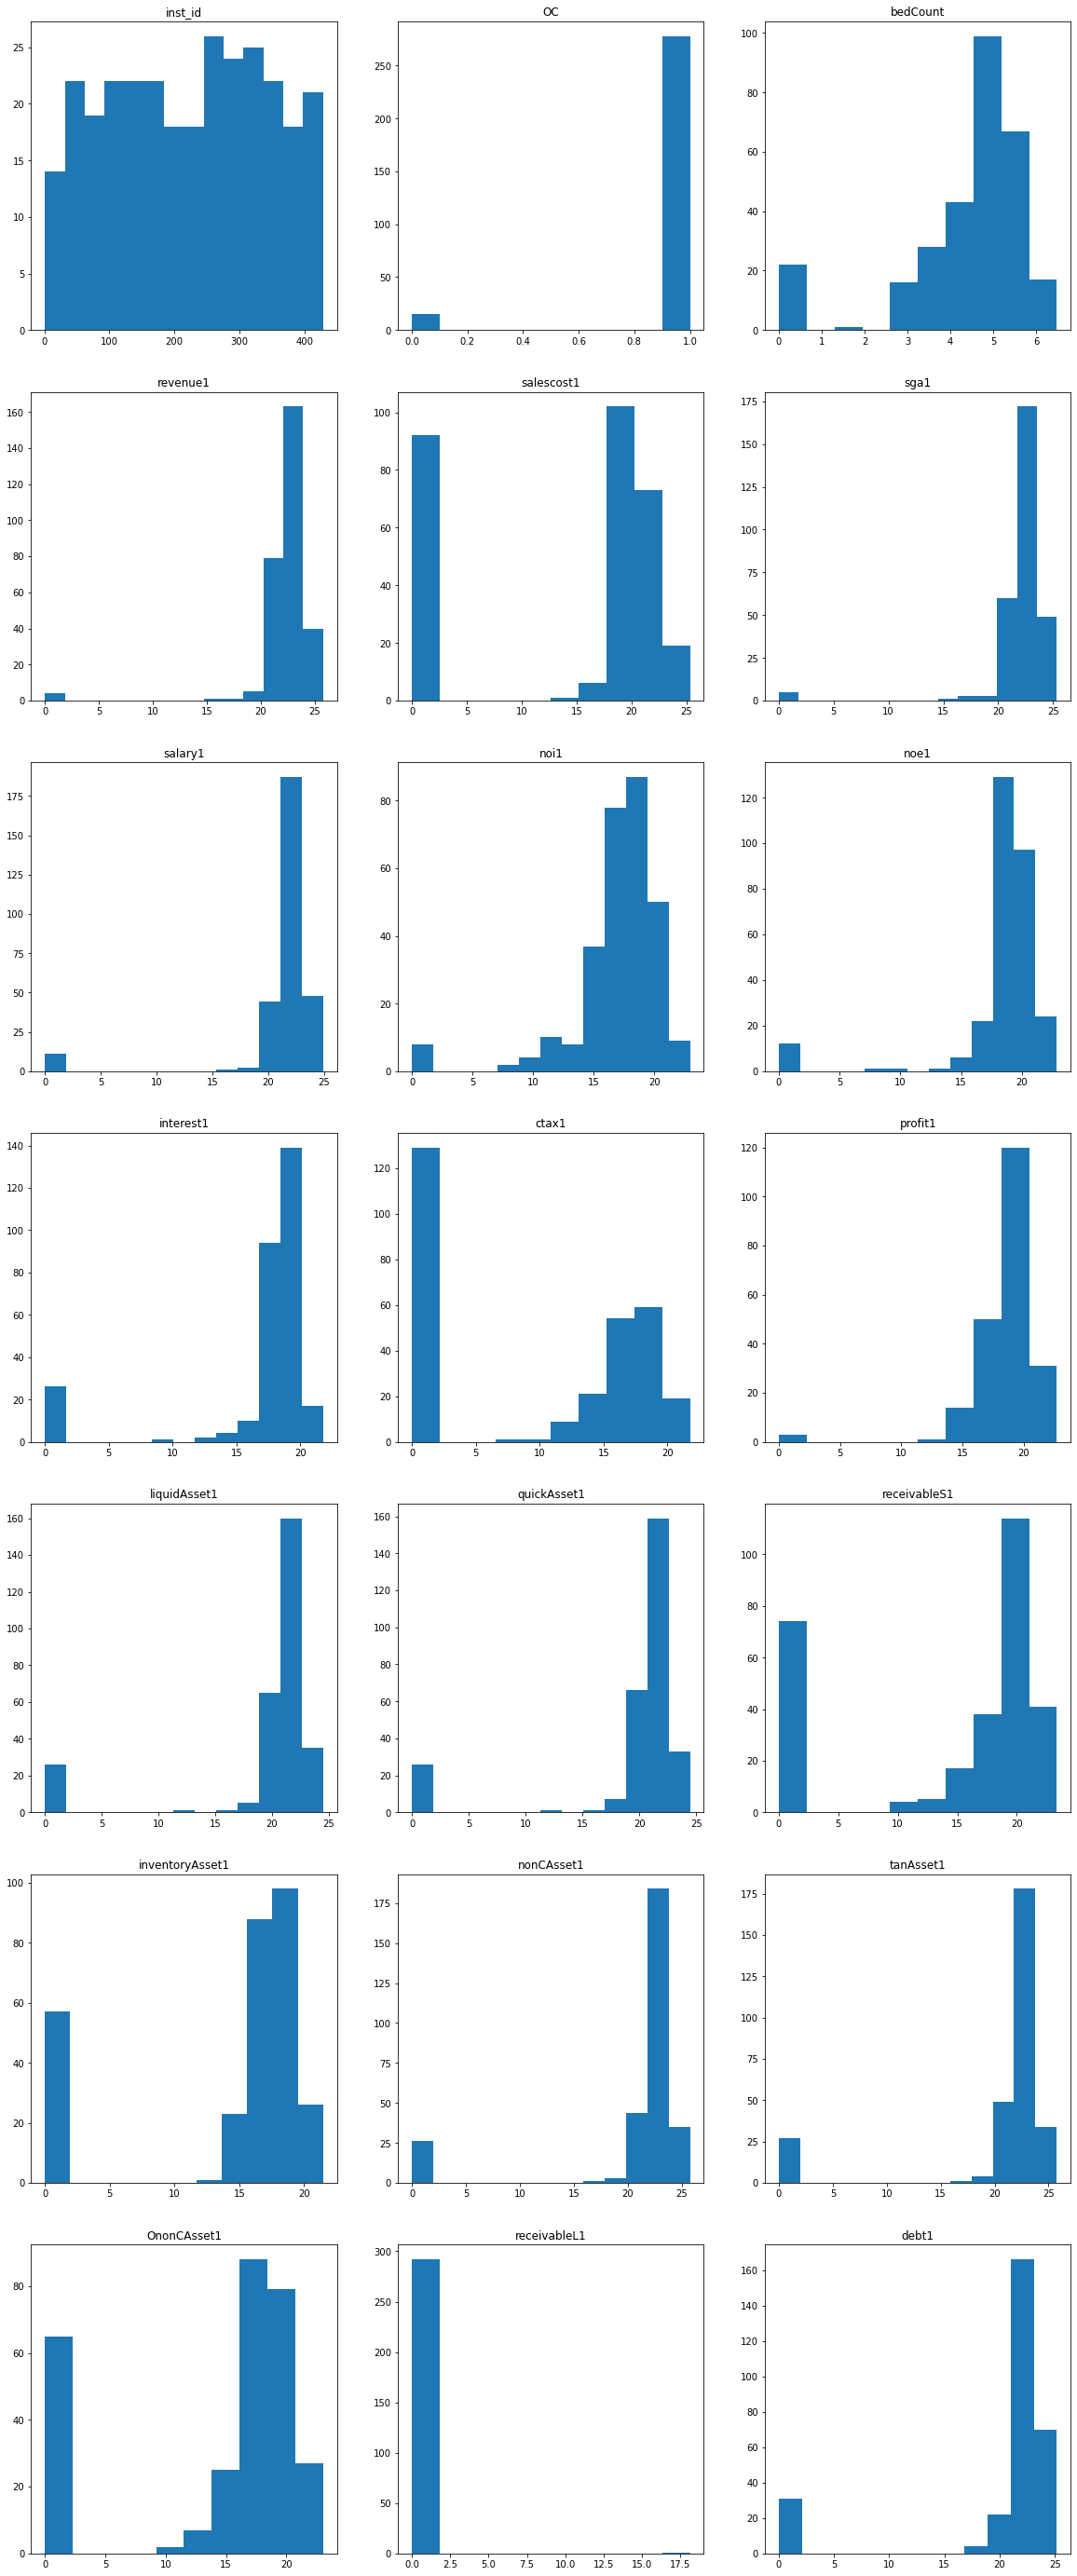

In [207]:
import matplotlib.pyplot as plt

n = 0
f, grid = plt.subplots(7, 3, figsize=(20, 50))
for row in grid:
    for ax in row:
        col = log_train_df.columns[n]
        ax.hist(log_train_df[col], bins=max(log_train_df[col].nunique()//20, 10))
        ax.set_title(col)
        n += 1

In [218]:
log_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   inst_id               293 non-null    int64  
 1   OC                    293 non-null    int64  
 2   bedCount              293 non-null    float64
 3   revenue1              293 non-null    float64
 4   salescost1            293 non-null    float64
 5   sga1                  293 non-null    float64
 6   salary1               293 non-null    float64
 7   noi1                  293 non-null    float64
 8   noe1                  293 non-null    float64
 9   interest1             293 non-null    float64
 10  ctax1                 293 non-null    float64
 11  profit1               219 non-null    float64
 12  liquidAsset1          293 non-null    float64
 13  quickAsset1           293 non-null    float64
 14  receivableS1          293 non-null    float64
 15  inventoryAsset1       2

In [220]:
log_train_df.set_index('inst_id',inplace=True)

In [208]:
! pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [221]:
X=log_train_df.drop('OC',axis=1)
Y=log_train_df['OC']

In [222]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid=train_test_split(X,Y)

In [223]:
x_train.shape

(219, 77)

In [224]:
y_train.value_counts()

1    208
0     11
Name: OC, dtype: int64

In [226]:
! pip uninstall imblearn

^C


In [233]:
! pip install imblearn==0.7.0

ERROR: Could not find a version that satisfies the requirement imblearn==0.7.0 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.7.0


In [234]:
from imblearn.over_sampling import SMOTE

oversampling_instance=SMOTE(k_neighbors=3)

o_x_train,o_y_train=oversampling_instance.fit_sample(x_train,y_train)

o_x_train=pd.dataframe(o_x_train,columns=X.columns)
o_y_train=pd.Series(o_y_train)

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py)

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(x_train)
test_features = scaler.transform(x_valid)

In [231]:
train_features[np.isfinite(train_features) == True] = 0

In [232]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(model.score(train_features, y_train))

In [ ]:
print(model.score(test_features, y_valid))

뒤는 clustering 해볼까 한 건데 신경쓰지 않으셔도 됩니다..

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
sido_df=train_df
sido_df.set_index('sido',inplace=True)
sido_df=sido_df.apply(lambda x: x.astype('float64'))
sido_df=sido_df.groupby('sido').median()
index_st=sido_df[sido_df['OC']==0].index
stores_df=stores_df.drop(index_st)

Z = linkage(stores_df, method='average')

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=stores_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

lda = LinearDiscriminantAnalysis(n_components=50) # LDA 적용, 50차원으로 줄이기 설정
lda.fit(train_imputed, train_imputed[1])
amex_lda = lda.transform(train_imputed)

print("BEFORE",train_imputed[:10])
print("BEFORE SHAPE",train_imputed.shape)

print()

print("AFTER",amex_lda[:10])
print("AFTER SHAPE",amex_lda.shape)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).